In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [47]:
cricket = pd.read_csv('Cricket - Kmeans clustering.csv',encoding= 'unicode_escape')

In [48]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [49]:
Scaler = StandardScaler()

In [50]:
cricket_numerical = cricket[['Ave','SR']]

In [51]:
cricket_numerical.columns

Index(['Ave', 'SR'], dtype='object')

In [52]:
cricket_scaled = Scaler.fit_transform(cricket_numerical)

In [53]:
cricket_scaled.shape

(79, 2)

In [9]:
from sklearn.cluster import KMeans

In [10]:
Kmeans = KMeans(n_clusters = 4,max_iter = 30)
Kmeans.fit(cricket_scaled)

KMeans(max_iter=30, n_clusters=4)

In [11]:
Kmeans.labels_

array([1, 2, 2, 0, 3, 2, 2, 2, 2, 2, 0, 2, 0, 1, 3, 1, 3, 0, 2, 2, 0, 2,
       3, 2, 0, 1, 0, 0, 3, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 1, 3,
       3, 3, 2, 3, 3, 2, 0, 2, 3, 3, 3, 3, 2, 0, 3, 0, 3, 0, 2, 1, 1, 2,
       2, 3, 2, 3, 0, 3, 3, 3, 2, 2, 3, 0, 3])

In [54]:
cricket_df = pd.DataFrame(cricket_scaled)

In [55]:
cricket_df

,0,1
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [57]:
cricket_df.columns = ['Ave','SR']

In [58]:
cricket_df

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [16]:
cricket_df['cluster_no'] = Kmeans.labels_

In [17]:
cricket_df['Player'] = cricket.Player

In [18]:
cricket_df[cricket_df.cluster_no == 2].Player

1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
5       Inzamam-ul-Haq (Asia/PAK)
6          JH Kallis (Afr/ICC/SA)
7         SC Ganguly (Asia/INDIA)
8       R Dravid (Asia/ICC/INDIA)
9                BC Lara (ICC/WI)
11     Mohammad Yousuf (Asia/PAK)
18              Saeed Anwar (PAK)
19             S Chanderpaul (WI)
21                 DL Haynes (WI)
23                 ME Waugh (AUS)
29                MJ Clarke (AUS)
32            Javed Miandad (PAK)
37              GC Smith (Afr/SA)
39                 G Kirsten (SA)
46               LRPL Taylor (NZ)
49            ML Hayden (AUS/ICC)
51                 DM Jones (AUS)
56                 RR Sarwan (WI)
62                 WJ Cronje (SA)
65              RG Sharma (INDIA)
66                  IR Bell (ENG)
68                DR Martyn (AUS)
74              CG Greenidge (WI)
75            Misbah-ul-Haq (PAK)
Name: Player, dtype: object

In [19]:
cricket_df

,Ave,SR,cluster_no,Player
0,1.072294,0.703152,1,SR Tendulkar (INDIA)
1,0.587725,-0.044139,2,KC Sangakkara (Asia/ICC/SL)
2,0.596226,0.110997,2,RT Ponting (AUS/ICC)
3,-1.047909,1.207091,0,ST Jayasuriya (Asia/SL)
4,-0.876185,-0.034000,3,DPMD Jayawardene (Asia/SL)
...,...,...,...,...
74,1.106299,-1.457604,2,CG Greenidge (WI)
75,0.829159,-0.562275,2,Misbah-ul-Haq (PAK)
76,-0.537836,-0.234765,3,PD Collingwood (ENG)
77,0.208570,1.332823,0,A Symonds (AUS)


<AxesSubplot:xlabel='Ave', ylabel='SR'>

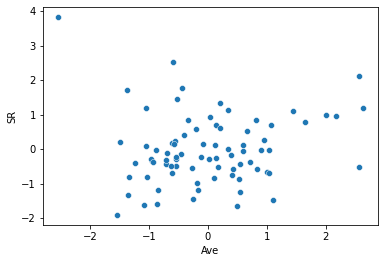

In [20]:
sns.scatterplot(x = 'Ave',y = 'SR',data= cricket_df)

In [21]:
cricket_df.groupby('cluster_no').mean('Ave')

,Ave,SR
cluster_no,,
0,-0.468855,1.365125
1,1.874242,0.910338
2,0.515268,-0.396336
3,-0.790039,-0.566669


In [22]:
x1 = cricket_df[cricket_df.cluster_no == 3].Player

<AxesSubplot:xlabel='cluster_no', ylabel='Player'>

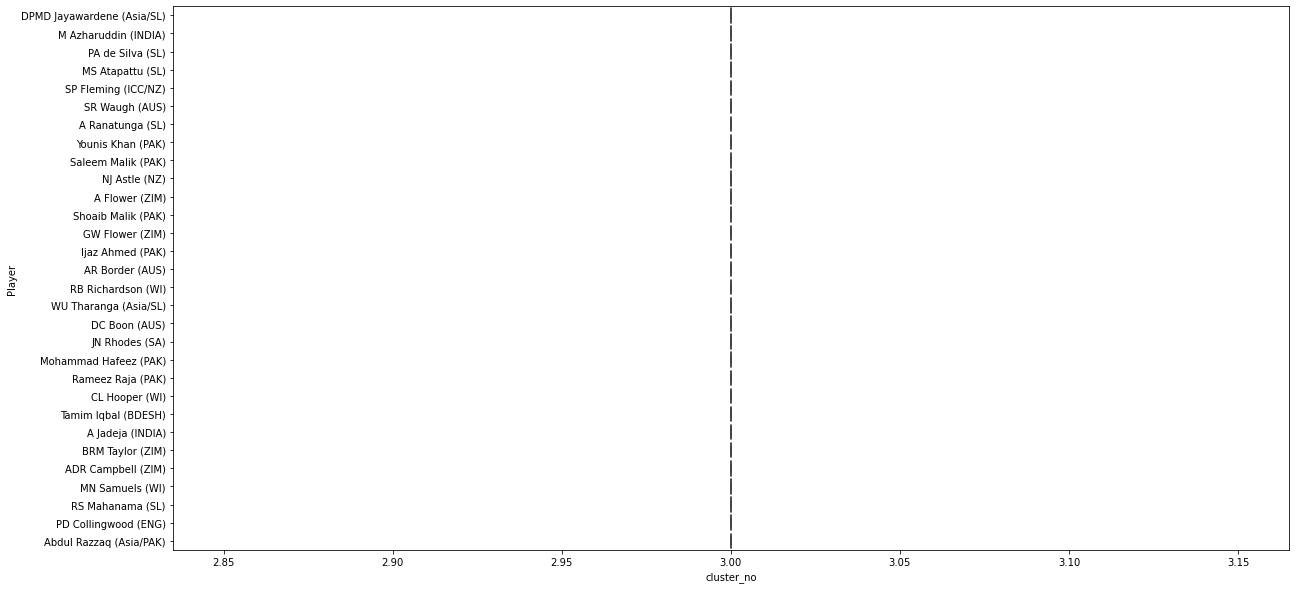

In [23]:
plt.figure(figsize=[20,10])
sns.boxplot(x= 'cluster_no', y= x1,data = cricket_df)

### Hierarchial Clustering

In [59]:
from scipy.cluster.hierarchy import linkage

In [60]:
cricket_df

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


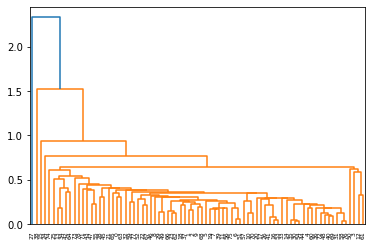

In [61]:
mergings = linkage(cricket_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

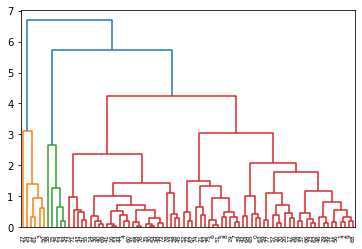

In [62]:
mergings = linkage(cricket_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

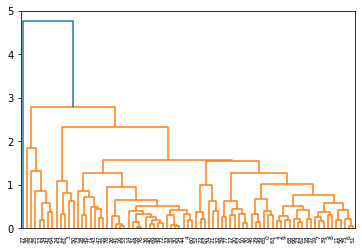

In [63]:
mergings = linkage(cricket_df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [64]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
cricket_df['cluster_labels'] = cluster_labels
cricket_df

,Ave,SR,cluster_labels
0,1.072294,0.703152,0
1,0.587725,-0.044139,0
2,0.596226,0.110997,0
3,-1.047909,1.207091,1
4,-0.876185,-0.034000,0
...,...,...,...
74,1.106299,-1.457604,0
75,0.829159,-0.562275,0
76,-0.537836,-0.234765,0
77,0.208570,1.332823,0


In [66]:
cricket_df['Players'] = cricket.Player

In [67]:
cricket_df

,Ave,SR,cluster_labels,Players
0,1.072294,0.703152,0,SR Tendulkar (INDIA)
1,0.587725,-0.044139,0,KC Sangakkara (Asia/ICC/SL)
2,0.596226,0.110997,0,RT Ponting (AUS/ICC)
3,-1.047909,1.207091,1,ST Jayasuriya (Asia/SL)
4,-0.876185,-0.034000,0,DPMD Jayawardene (Asia/SL)
...,...,...,...,...
74,1.106299,-1.457604,0,CG Greenidge (WI)
75,0.829159,-0.562275,0,Misbah-ul-Haq (PAK)
76,-0.537836,-0.234765,0,PD Collingwood (ENG)
77,0.208570,1.332823,0,A Symonds (AUS)


In [68]:
for x in cricket_df[cricket_df.cluster_labels == 0].Players:
    print(x)



SR Tendulkar (INDIA)
KC Sangakkara (Asia/ICC/SL)
RT Ponting (AUS/ICC)
DPMD Jayawardene (Asia/SL)
Inzamam-ul-Haq (Asia/PAK)
JH Kallis (Afr/ICC/SA)
SC Ganguly (Asia/INDIA)
R Dravid (Asia/ICC/INDIA)
BC Lara (ICC/WI)
TM Dilshan (SL)
Mohammad Yousuf (Asia/PAK)
M Azharuddin (INDIA)
PA de Silva (SL)
CH Gayle (ICC/WI)
Saeed Anwar (PAK)
S Chanderpaul (WI)
Yuvraj Singh (Asia/INDIA)
DL Haynes (WI)
MS Atapattu (SL)
ME Waugh (AUS)
HH Gibbs (SA)
SP Fleming (ICC/NZ)
MJ Clarke (AUS)
SR Waugh (AUS)
A Ranatunga (SL)
Javed Miandad (PAK)
Younis Khan (PAK)
Saleem Malik (PAK)
NJ Astle (NZ)
GC Smith (Afr/SA)
G Kirsten (SA)
A Flower (ZIM)
Shoaib Malik (PAK)
GW Flower (ZIM)
Ijaz Ahmed (PAK)
AR Border (AUS)
LRPL Taylor (NZ)
RB Richardson (WI)
WU Tharanga (Asia/SL)
ML Hayden (AUS/ICC)
DM Jones (AUS)
DC Boon (AUS)
JN Rhodes (SA)
Mohammad Hafeez (PAK)
Rameez Raja (PAK)
RR Sarwan (WI)
EJG Morgan (ENG/IRE)
CL Hooper (WI)
SR Watson (AUS)
Tamim Iqbal (BDESH)
WJ Cronje (SA)
MJ Guptill (NZ)
RG Sharma (INDIA)
IR Bell (EN

In [79]:
cricket_df[cricket_df.cluster_labels == 0].max()

Ave                                1.106299
SR                                 1.332823
cluster_labels                            0
Players           Yuvraj Singh (Asia/INDIA)
dtype: object